# # Basic Settings

### explore directory / file

In [2]:
pwd

'/Users/hwan/Desktop/git_repos/NUS_MSBA_Study'

In [1]:
ls

README.md       [SHM] 01.ipynb  data/           test.txt


In [3]:
cd data/

/Users/hwan/Desktop/git_repos/NUS_MSBA_Study/data


In [4]:
ls

footnotes-in-annual-report-for-price-range-of-hdb-flats-offered.pdf
metadata-price-range-of-hdb-flats-offered.txt
price-range-of-hdb-flats-offered.csv


In [5]:
cd ..

/Users/hwan/Desktop/git_repos/NUS_MSBA_Study


### read fiile

In [6]:
import pandas as pd
df_orig = pd.read_csv('./data/price-range-of-hdb-flats-offered.csv')
df_orig.shape

(233, 7)

In [7]:
df = df_orig.copy()
print(df.shape)
display(df.head(2), df.tail(2))

(233, 7)


,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0


,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
231,2019,Woodlands,4-room,244000,295000,184000,235000
232,2019,Woodlands,5-room,336000,383000,331000,378000


### import packages

In [18]:
import io
import os
import gc
import json
import sys
# print('-------------------------------------------')
# print('system_version:', '\n', sys.version)
# print('-------------------------------------------')
# print('system_version_info:', '\n', sys.version_info)
# print('-------------------------------------------')

import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 100)    # max column width
# pd.options.display.max_rows = 999   # max row

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')            # set seaborn scheme
%matplotlib inline                    # show plot inline

import seaborn as sns
sns.set(font_scale=2.5)               # set seaborn font_scale at once
sns.set(style='white', context='notebook', palette='deep')

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import warnings
warnings.filterwarnings('ignore')

-------------------------------------------
system_version: 
 3.8.2 (default, Mar 26 2020, 10:43:30) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
-------------------------------------------
system_version_info: 
 sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)
-------------------------------------------


In [19]:
df.head(2)

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0


# # EDA - Null Check

### UDFs
   - null_check_for_loop(): [DataFrame]
   - null_check_msno_matrix_default(): [DataFrame]
   - null_check_msno_matrix_cust(): [DataFrame]
   - null_check_msno_bar(): [DataFrame]
   - null_check_sns_heatmap(): [DataFrame]

#### 1)

In [24]:
def null_check_for_loop(df):
    for col in df.columns :
        msg = 'column: {:>30}\t Pearcent of NaN value: {:.2f}%'.format(col, 100*(df[col].isnull().sum() / df[col].shape[0]))
        print(msg)

In [25]:
null_check_for_loop(df)

column:                 financial_year	 Pearcent of NaN value: 0.00%
column:                           town	 Pearcent of NaN value: 0.00%
column:                      room_type	 Pearcent of NaN value: 0.00%
column:              min_selling_price	 Pearcent of NaN value: 0.00%
column:              max_selling_price	 Pearcent of NaN value: 0.00%
column: min_selling_price_less_ahg_shg	 Pearcent of NaN value: 0.00%
column: max_selling_price_less_ahg_shg	 Pearcent of NaN value: 0.00%


#### 2)

In [28]:
import missingno as msno
def null_check_msno_matrix_default(df):
    msno.matrix(df)

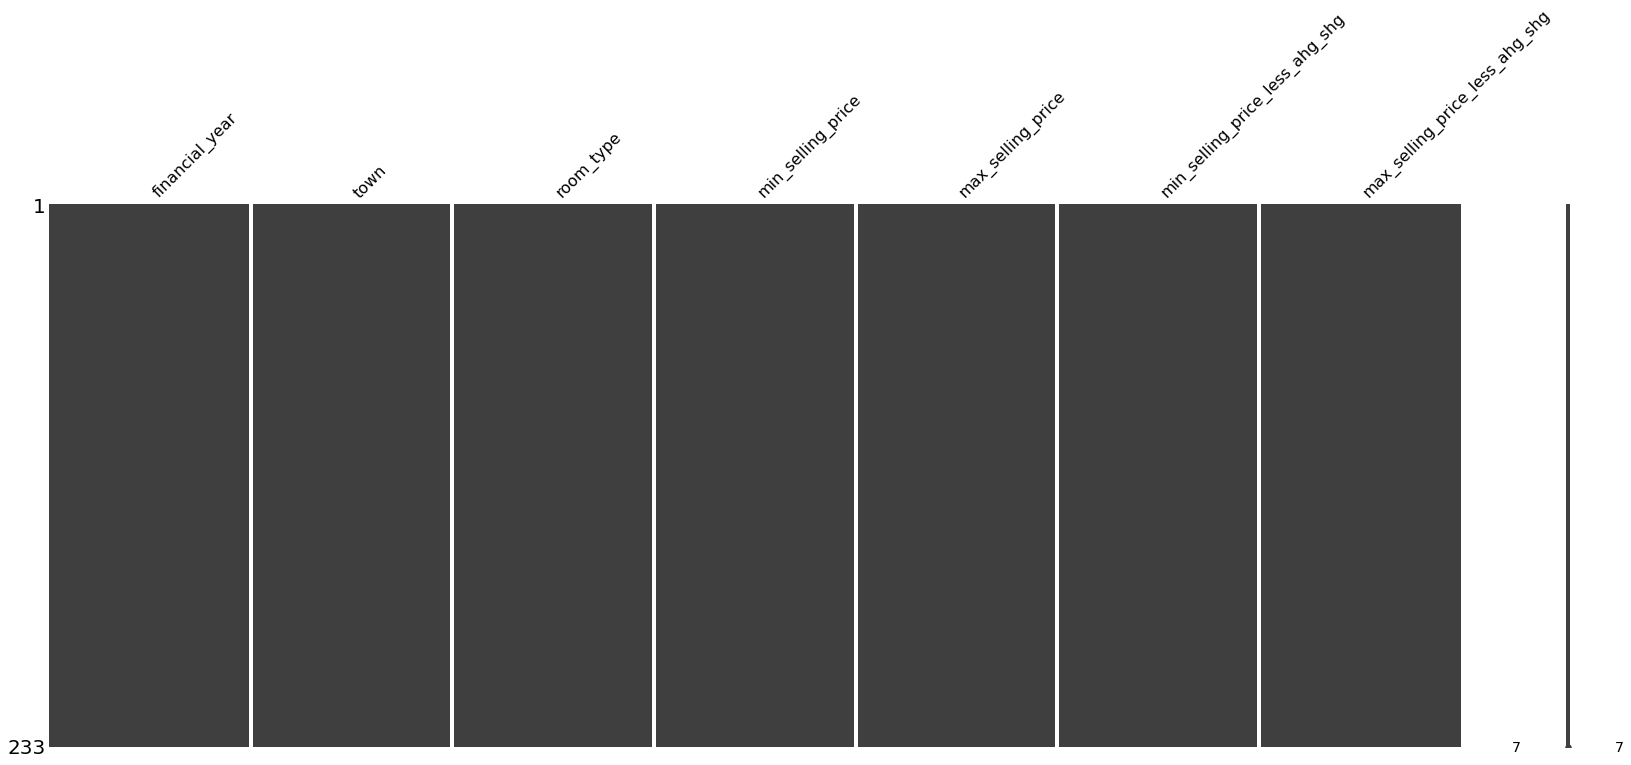

In [29]:
null_check_msno_matrix_default(df)

In [44]:
import missingno as msno
def null_check_msno_matrix_cust(df):
    msno.matrix(df=df.iloc[:, :], figsize=(8,4), color=(0.8, 0.5, 0.2))

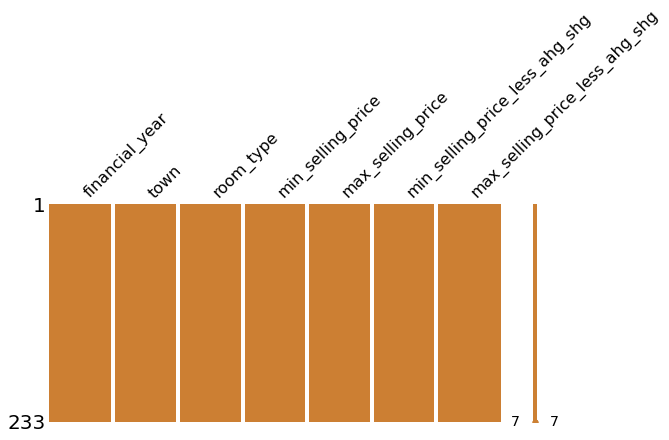

In [45]:
null_check_msno_matrix_cust(df)

In [33]:
import missingno as msno
def null_check_msno_bar(df):
    msno.bar(df)

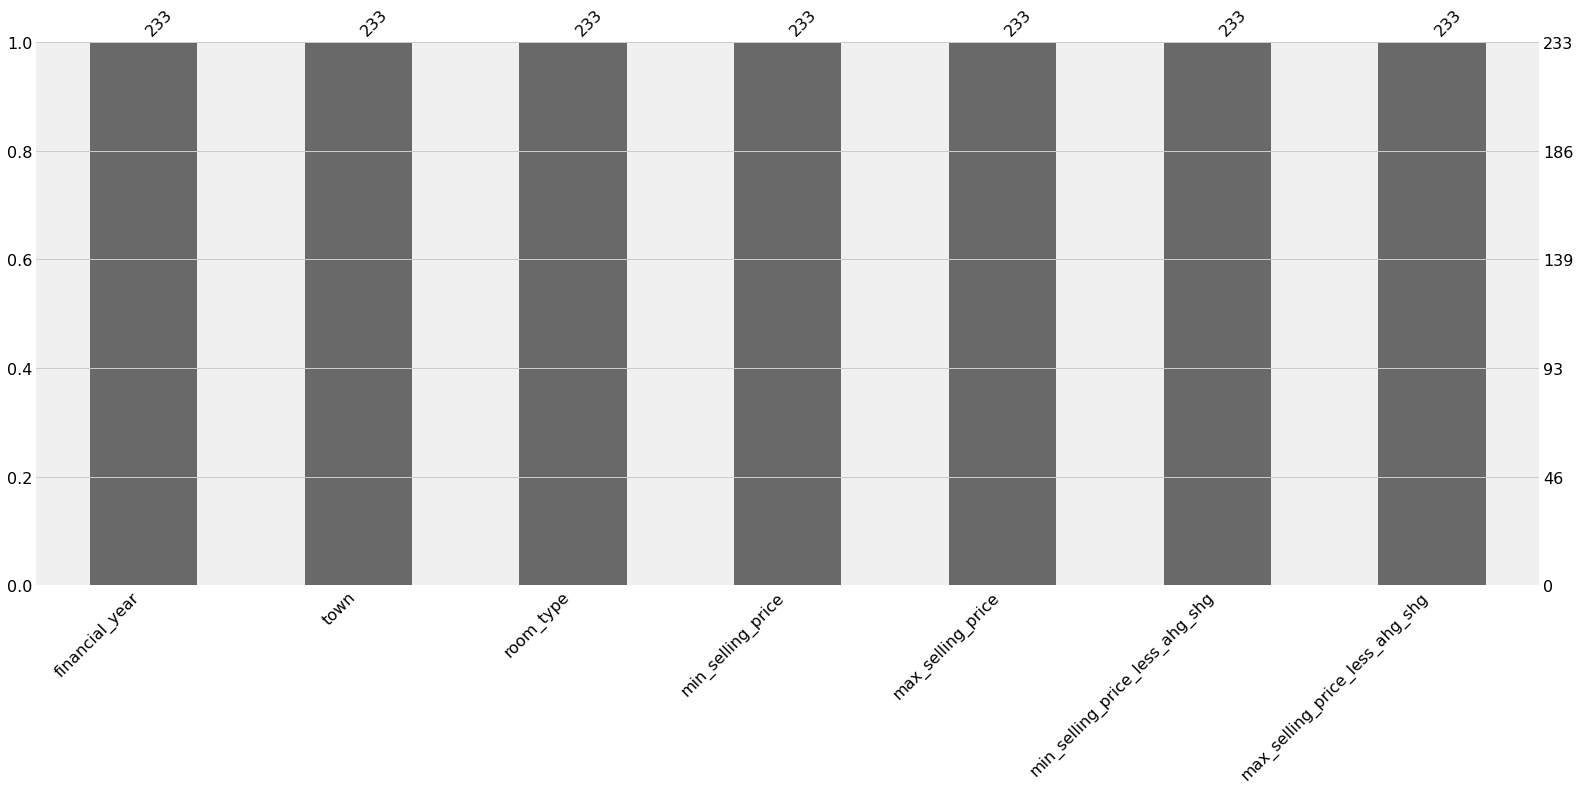

In [34]:
null_check_msno_bar(df)

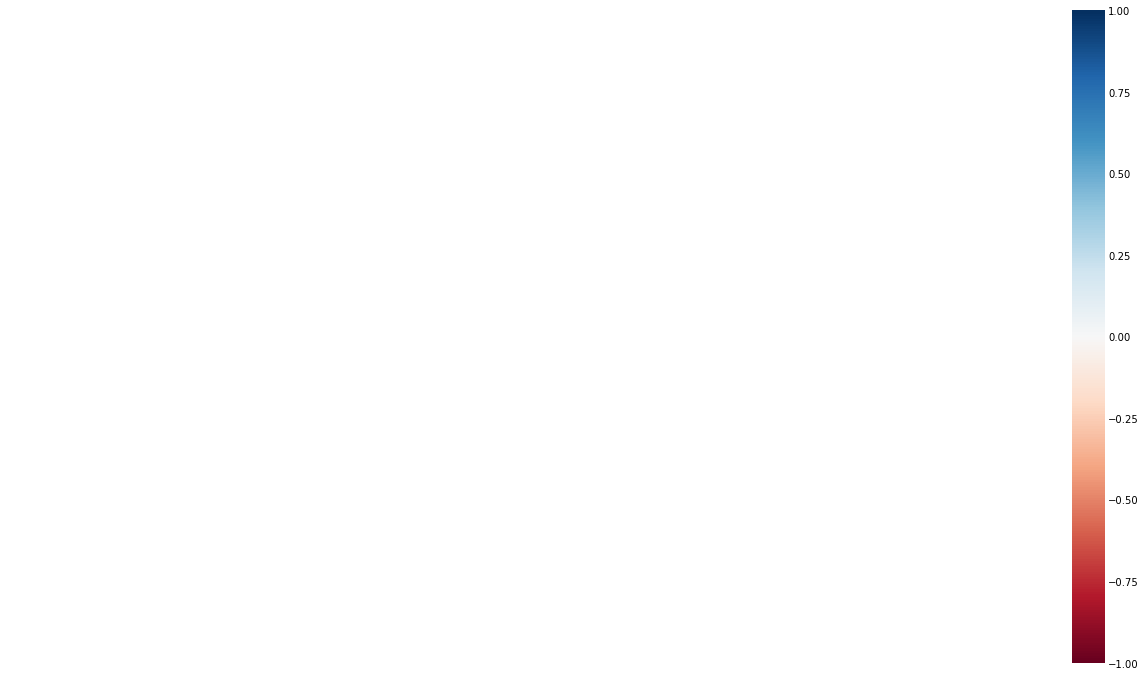

In [36]:
msno.heatmap(df)   # if null value exists, heatmap appears

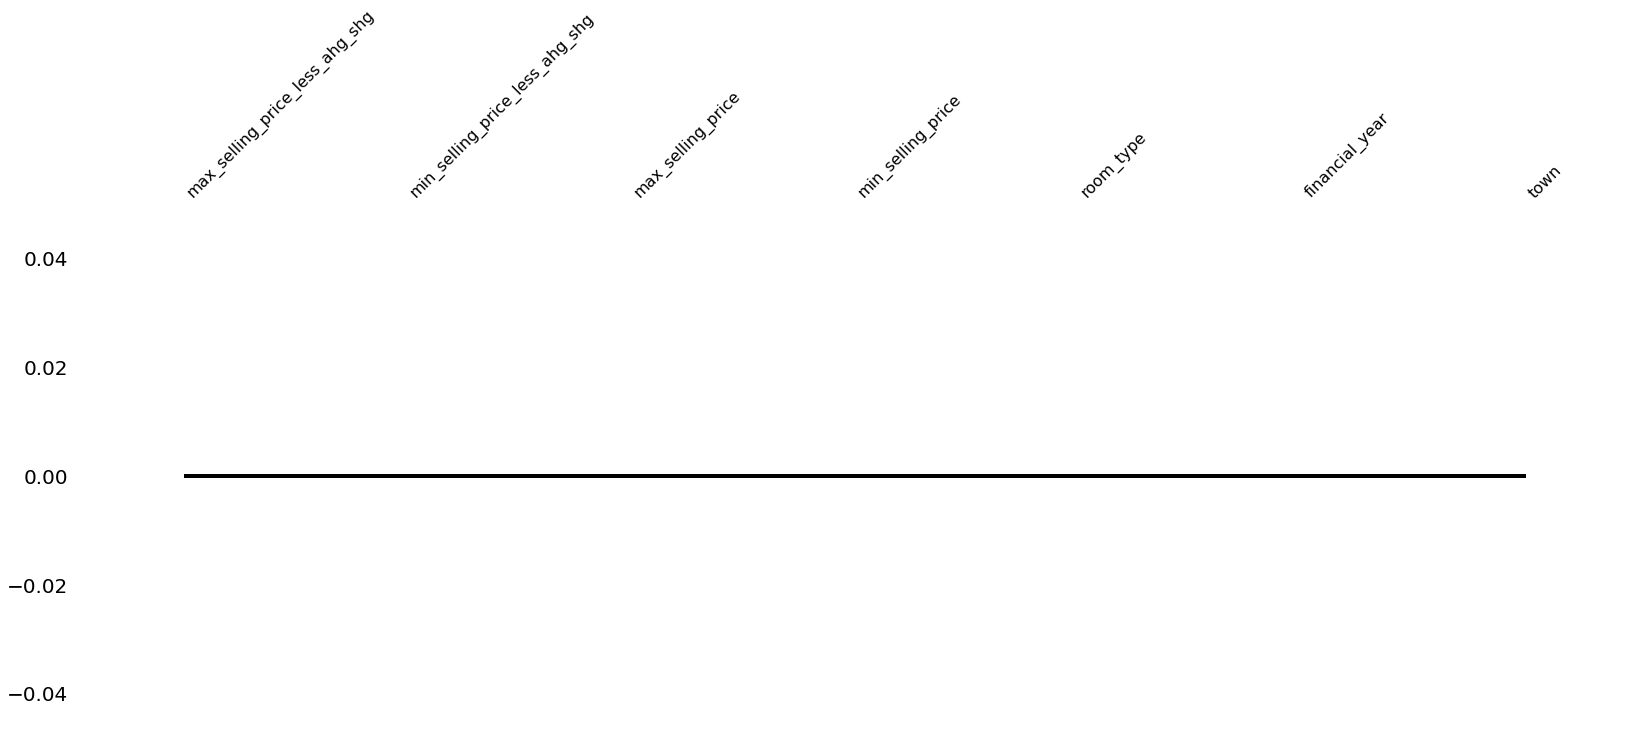

In [38]:
msno.dendrogram(df)   # if null value exists, diagram appears

#### 3) using seaborn package

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
def null_check_sns_heatmap(df):
    sns.heatmap(df.isnull(), cbar=False)   
    # if null value exists, white line appears

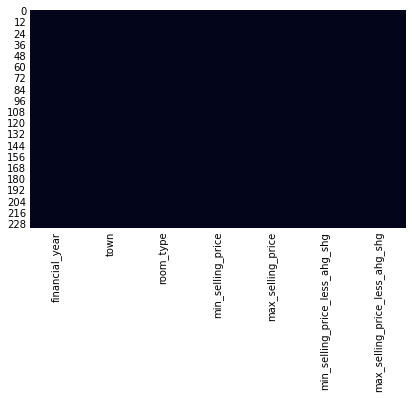

In [43]:
null_check_sns_heatmap(df)

# # EDA - Basic statistics

In [47]:
df.shape

(233, 7)

In [48]:
df.head(5).transpose()

,0,1,2,3,4
financial_year,2008,2008,2008,2008,2008
town,Punggol,Punggol,Punggol,Punggol,Jurong West
room_type,2-room,3-room,4-room,5-room,3-room
min_selling_price,82000,135000,223000,305000,142000
max_selling_price,107000,211000,327000,428000,160000
min_selling_price_less_ahg_shg,0,0,0,0,0
max_selling_price_less_ahg_shg,0,0,0,0,0


In [52]:
df.head(5).transpose()

,0,1,2,3,4
financial_year,2008,2008,2008,2008,2008
town,Punggol,Punggol,Punggol,Punggol,Jurong West
room_type,2-room,3-room,4-room,5-room,3-room
min_selling_price,82000,135000,223000,305000,142000
max_selling_price,107000,211000,327000,428000,160000
min_selling_price_less_ahg_shg,0,0,0,0,0
max_selling_price_less_ahg_shg,0,0,0,0,0


### col.1) financial_year

In [61]:
len(df['financial_year'].unique())

12

In [62]:
df['financial_year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

In [63]:
df['financial_year'].describe()

count     233.000000
mean     2013.622318
std         3.404335
min      2008.000000
25%      2011.000000
50%      2014.000000
75%      2017.000000
max      2019.000000
Name: financial_year, dtype: float64

In [64]:
df['financial_year'].value_counts()

2018    24
2017    24
2014    24
2013    23
2011    20
2009    19
2010    18
2008    17
2019    16
2016    16
2015    16
2012    16
Name: financial_year, dtype: int64

### col.2) town

In [67]:
len(df['town'].unique())

10

In [68]:
df['town'].unique()

array(['Punggol', 'Jurong West', 'Bukit Panjang', 'Woodlands', 'Sengkang',
       'Choa Chu Kang', 'Sembawang', 'Yishun', 'Bukit Batok', 'Tengah'],
      dtype=object)

In [70]:
df['town'].describe()

count         233
unique         10
top       Punggol
freq           47
Name: town, dtype: object

In [71]:
df['town'].value_counts()

Punggol          47
Sengkang         39
Woodlands        27
Sembawang        27
Yishun           26
Bukit Panjang    17
Choa Chu Kang    17
Jurong West      13
Bukit Batok      12
Tengah            8
Name: town, dtype: int64

### col.3) room_type

In [76]:
# len(df['room_type'].unique())

In [77]:
df['room_type'].describe()

count        233
unique         4
top       4-room
freq          63
Name: room_type, dtype: object

In [78]:
df['room_type'].unique()

array(['2-room', '3-room', '4-room', '5-room'], dtype=object)

In [79]:
df['room_type'].value_counts()

4-room    63
3-room    62
5-room    57
2-room    51
Name: room_type, dtype: int64

### Point.1
 - hierarchical column dimension
 - dimension column: [financial_year, town, room_type]

# Problem Definition <font style="color:red">(**IMPORTANT!!!**)</font> 
 - **What is the problem?**
 - **What is the question?**
 - **What do I want to know?**

In [91]:
df.head()

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0
2,2008,Punggol,4-room,223000,327000,0,0
3,2008,Punggol,5-room,305000,428000,0,0
4,2008,Jurong West,3-room,142000,160000,0,0


# Questions
 - Q1) (Info. about Room type) 
   - In average, how much have the 2-room selling price increased(ratio) as time goes by from 2008 to 2018? What about other room types? What room type has the biggest increase in selling price?
 - Q2) (One more dimension: Info. about town) 
   - What town has the biggest increase(ratio) in selling price, comparing 2008 and 2018? Which town is the smallest?
 - Q3) (Info.about the gap between max. and min. values) 
   - In 2018, how is the gap between min price and max price for each town in average? For each town, which room-type has the largest selling price gap?!

# What kind of questions that we can sove using Machine Learning methods? 
 - not a tidy data... and a few rows... so... 
 - but still regression for (average) price prediction...

# Appendix... 

### Next... let's look into 2018...

In [81]:
df.head(2)

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0


In [87]:
type(df['financial_year'][0])

numpy.int64

In [90]:
d2018 = df[df['financial_year']==2018]
print(d2018.shape)
d2018.head(5).transpose()

(24, 7)


,193,194,195,196,197
financial_year,2018,2018,2018,2018,2018
town,Jurong West,Jurong West,Jurong West,Jurong West,Punggol
room_type,2-room,3-room,4-room,5-room,2-room
min_selling_price,95000,185000,257000,338000,103000
max_selling_price,160000,243000,364000,457000,158000
min_selling_price_less_ahg_shg,15000,110000,197000,333000,23000
max_selling_price_less_ahg_shg,80000,168000,304000,452000,78000
